# **Brain Tumor MRI Segmentation**

Classes:
*   0: No Tumor
*   1: Glioma
*   2: Meningioma
*   3: Pituitary
*   4: Brain_Tumor




In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, VGG19, ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import (
    Xception, VGG19, ResNet50V2, ResNet101V2, ResNet152V2, InceptionV3, InceptionResNetV2,
    MobileNetV2, DenseNet201, NASNetLarge, EfficientNetB7,
    EfficientNetV2B3, EfficientNetV2L, ConvNeXtXLarge
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2025-12-02 12:42:27.088643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764679347.500274      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764679347.639396      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
train_path = "/kaggle/input/brain-tumor-classification-mri/Training"
test_path  = "/kaggle/input/brain-tumor-classification-mri/Testing"

# Xception

### Data preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


### Xception model

In [4]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_set.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

I0000 00:00:1764679375.652391      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764679375.653038      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Train

In [5]:
model.fit(train_set, validation_data=test_set, epochs=20)
# model.fit --resume

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1764679385.176238      77 service.cc:148] XLA service 0x799e5c0036f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764679385.178157      77 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764679385.178186      77 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764679386.163530      77 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/90 ━━━━━━━━━━━━━━━━━━━━ 21:06 14s/step - accuracy: 0.0938 - loss: 1.7082

I0000 00:00:1764679394.225482      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 77s 700ms/step - accuracy: 0.4446 - loss: 1.2071 - val_accuracy: 0.5254 - val_loss: 1.2406
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 400ms/step - accuracy: 0.7396 - loss: 0.7075 - val_accuracy: 0.5355 - val_loss: 1.2042
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 408ms/step - accuracy: 0.7771 - loss: 0.5888 - val_accuracy: 0.5711 - val_loss: 1.1948
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 416ms/step - accuracy: 0.8133 - loss: 0.5307 - val_accuracy: 0.6041 - val_loss: 1.2157
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 411ms/step - accuracy: 0.8307 - loss: 0.4965 - val_accuracy: 0.6091 - val_loss: 1.2189
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 412ms/step - accuracy: 0.8475 - loss: 0.4446 - val_accuracy: 0.6091 - val_loss: 1.1398
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - accuracy: 0.8417 - loss: 0.4371 - val_accuracy: 0.6244 - val_loss: 1.2040
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 410ms/step - accuracy: 0.8441 - loss: 0.4394 - val_accuracy: 0.642

### Predictions

In [6]:
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes
target_names = list(test_set.class_indices.keys())

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step


### Classification Report


In [7]:
print("Xception Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

Xception Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.74      0.34      0.47       100
meningioma_tumor       0.66      0.80      0.72       115
        no_tumor       0.69      0.94      0.80       105
 pituitary_tumor       0.75      0.65      0.70        74

        accuracy                           0.69       394
       macro avg       0.71      0.68      0.67       394
    weighted avg       0.70      0.69      0.67       394



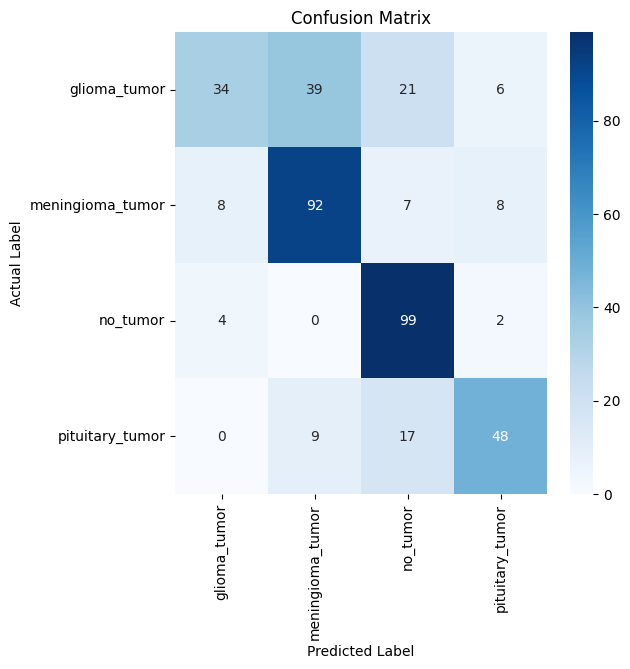

In [8]:
# 1. Generate the Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 2. Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# VGG19

### Data preprocessing

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


### VGG19 model

In [10]:
base_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_vgg.layers:
    layer.trainable = False

x = base_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
vgg_output = Dense(train_set.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_vgg.input, outputs=vgg_output)
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Train

In [11]:
history = vgg_model.fit(train_set, validation_data=test_set, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 634ms/step - accuracy: 0.3585 - loss: 1.3952 - val_accuracy: 0.2563 - val_loss: 1.4275
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.4943 - loss: 1.2691 - val_accuracy: 0.2893 - val_loss: 1.3665
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 442ms/step - accuracy: 0.5235 - loss: 1.2026 - val_accuracy: 0.2792 - val_loss: 1.3495
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.5404 - loss: 1.1634 - val_accuracy: 0.2741 - val_loss: 1.3901
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.5372 - loss: 1.1227 - val_accuracy: 0.3173 - val_loss: 1.3399
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.5862 - loss: 1.0741 - val_accuracy: 0.3147 - val_loss: 1.3299
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.5819 - loss: 1.0427 - val_accuracy: 0.3909 - val_loss: 1.3353
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 443ms/step - accuracy: 0.6101 - loss: 1.0220 - val_accu

### Predictions

In [12]:
vgg_pred = vgg_model.predict(test_set)
vgg_pred_classes = np.argmax(vgg_pred, axis=1)
y_true = test_set.classes
target_names = list(test_set.class_indices.keys())

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step


### Classification report

In [13]:
print("VGG19 Classification Report:")
print(classification_report(y_true, vgg_pred_classes, target_names=target_names))

VGG19 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.35      0.19      0.25       100
meningioma_tumor       0.38      0.24      0.30       115
        no_tumor       0.48      0.65      0.55       105
 pituitary_tumor       0.44      0.73      0.55        74

        accuracy                           0.43       394
       macro avg       0.41      0.45      0.41       394
    weighted avg       0.41      0.43      0.40       394



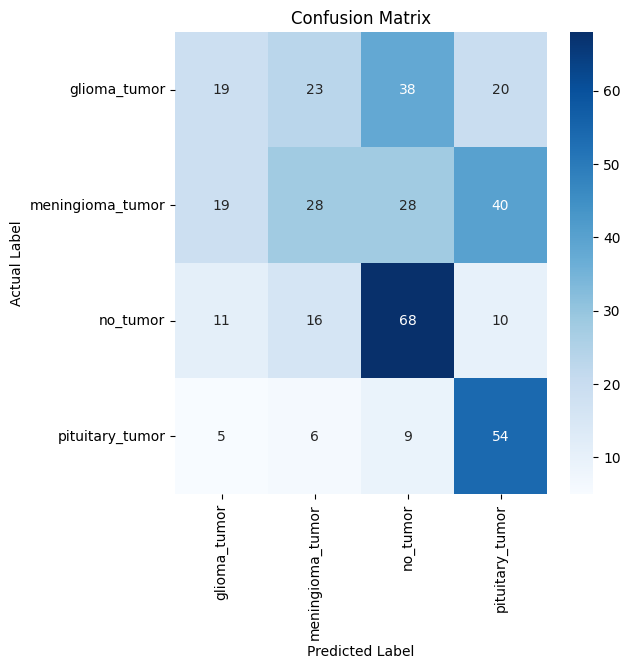

In [14]:
cm = confusion_matrix(y_true, vgg_pred_classes)

# 2. Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# ResNet50V2

### Data preprocessing

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)



Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


### ResNet50V2 model

In [16]:
base_resnet = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_resnet.layers:
    layer.trainable = False

x = base_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
res_output = Dense(train_set.num_classes, activation='softmax')(x)

resnet_model = Model(inputs=base_resnet.input, outputs=res_output)
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Train

In [17]:
resnet_model.fit(train_set, validation_data=test_set, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 61s 544ms/step - accuracy: 0.5458 - loss: 1.0956 - val_accuracy: 0.4848 - val_loss: 1.1842
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 414ms/step - accuracy: 0.7771 - loss: 0.6136 - val_accuracy: 0.5711 - val_loss: 1.0733
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - accuracy: 0.8211 - loss: 0.5023 - val_accuracy: 0.5964 - val_loss: 1.0814
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 416ms/step - accuracy: 0.8573 - loss: 0.4105 - val_accuracy: 0.6320 - val_loss: 1.0089
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 425ms/step - accuracy: 0.8728 - loss: 0.3800 - val_accuracy: 0.6777 - val_loss: 0.9891
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 415ms/step - accuracy: 0.8888 - loss: 0.3547 - val_accuracy: 0.6853 - val_loss: 0.9114
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 416ms/step - accuracy: 0.8884 - loss: 0.3246 - val_accuracy: 0.7183 - val_loss: 0.8912
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - accuracy: 0.8911 - loss: 0.3145 - val_accu

### Predictions

In [18]:
res_pred = resnet_model.predict(test_set)
res_pred_classes = np.argmax(res_pred, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step


### Classification report

In [19]:
print("ResNet50V2 Classification Report:")
print(classification_report(y_true, res_pred_classes, target_names=target_names))

ResNet50V2 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.81      0.50      0.62       100
meningioma_tumor       0.73      0.93      0.82       115
        no_tumor       0.80      0.95      0.87       105
 pituitary_tumor       0.98      0.80      0.88        74

        accuracy                           0.80       394
       macro avg       0.83      0.80      0.80       394
    weighted avg       0.82      0.80      0.79       394



# Helper function for model creation

In [20]:
def build_and_train(model_class, model_name, input_size=(224, 224, 3), lr=1e-4, epochs=20):
    print(f"\n===== Training {model_name} =====")
    base_model = model_class(weights='imagenet', include_top=False, input_shape=input_size)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(train_set.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_set, validation_data=test_set, epochs=epochs)

    # Predictions
    y_pred = model.predict(test_set)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_set.classes
    target_names = list(test_set.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred_classes)

    # 2. Plot the Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=target_names))

# ResNet101V2


===== Training ResNet101V2 =====
171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 68s 578ms/step - accuracy: 0.4360 - loss: 1.2862 - val_accuracy: 0.4797 - val_loss: 1.1840
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.7466 - loss: 0.6633 - val_accuracy: 0.5381 - val_loss: 1.0873
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.7885 - loss: 0.5553 - val_accuracy: 0.5812 - val_loss: 1.0180
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 432ms/step - accuracy: 0.8425 - loss: 0.4624 - val_accuracy: 0.6269 - val_loss: 1.0055
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 442ms/step - accuracy: 0.8552 - loss: 0.4128 - val_accuracy: 0.6269 - val_loss: 0.9570
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 434ms/step - accuracy: 0.8637 - loss: 0.3979 - val_accuracy: 0.6447 - val_loss: 0.9479
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 429ms/step - accuracy: 0.8685 - loss: 0.3773 - val_accuracy: 0.6751 - val_loss: 0.9530
Epoch 8/20

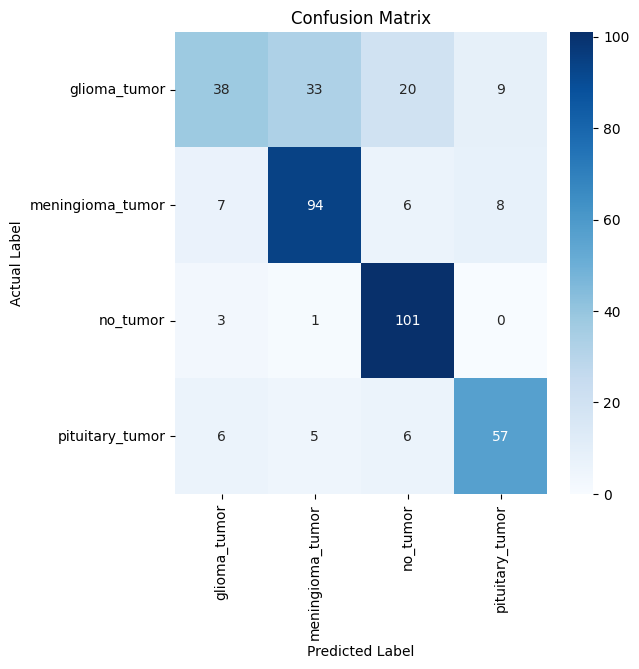


ResNet101V2 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.70      0.38      0.49       100
meningioma_tumor       0.71      0.82      0.76       115
        no_tumor       0.76      0.96      0.85       105
 pituitary_tumor       0.77      0.77      0.77        74

        accuracy                           0.74       394
       macro avg       0.74      0.73      0.72       394
    weighted avg       0.73      0.74      0.72       394



In [21]:
build_and_train(ResNet101V2, "ResNet101V2")

# ResNet152V2


===== Training ResNet152V2 =====
234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 656ms/step - accuracy: 0.5025 - loss: 1.1331 - val_accuracy: 0.5355 - val_loss: 1.1208
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 452ms/step - accuracy: 0.7734 - loss: 0.6078 - val_accuracy: 0.5812 - val_loss: 1.0016
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.8017 - loss: 0.5254 - val_accuracy: 0.6193 - val_loss: 0.9985
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.8372 - loss: 0.4544 - val_accuracy: 0.6345 - val_loss: 0.9803
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 458ms/step - accuracy: 0.8413 - loss: 0.4170 - val_accuracy: 0.6751 - val_loss: 0.9074
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 455ms/step - accuracy: 0.8593 - loss: 0.3799 - val_accuracy: 0.6777 - val_loss: 0.9679
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 446ms/step - accuracy: 0.8796 - loss: 0.3463 - val_accuracy: 0.6777 - val_loss: 0.9351
Epoch 8/20

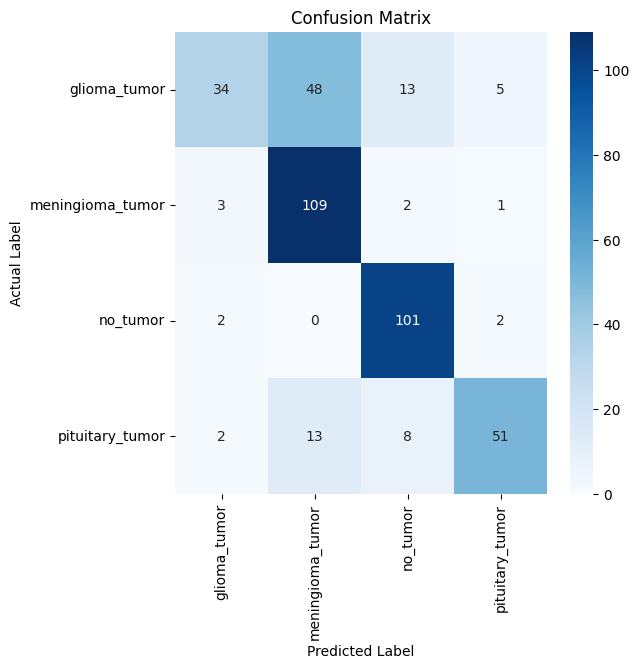


ResNet152V2 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.83      0.34      0.48       100
meningioma_tumor       0.64      0.95      0.76       115
        no_tumor       0.81      0.96      0.88       105
 pituitary_tumor       0.86      0.69      0.77        74

        accuracy                           0.75       394
       macro avg       0.79      0.73      0.72       394
    weighted avg       0.78      0.75      0.72       394



In [22]:
build_and_train(ResNet152V2, "ResNet152V2")

# InceptionV3


===== Training InceptionV3 =====
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 625ms/step - accuracy: 0.4269 - loss: 1.4050 - val_accuracy: 0.5152 - val_loss: 1.2034
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - accuracy: 0.7240 - loss: 0.7151 - val_accuracy: 0.5635 - val_loss: 1.1224
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 428ms/step - accuracy: 0.7764 - loss: 0.5613 - val_accuracy: 0.6168 - val_loss: 1.0459
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 437ms/step - accuracy: 0.8041 - loss: 0.5158 - val_accuracy: 0.6472 - val_loss: 0.9863
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 423ms/step - accuracy: 0.8263 - loss: 0.4683 - val_accuracy: 0.6269 - val_loss: 1.0105
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 422ms/step - accuracy: 0.8405 - loss: 0.4502 - val_accuracy: 0.6142 - val_loss: 0.9944
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 419ms/step - accuracy: 0.8475 - loss: 0.4251 - val_accuracy: 0.6624 - val_loss: 0.9599
Epoch 8/20
9

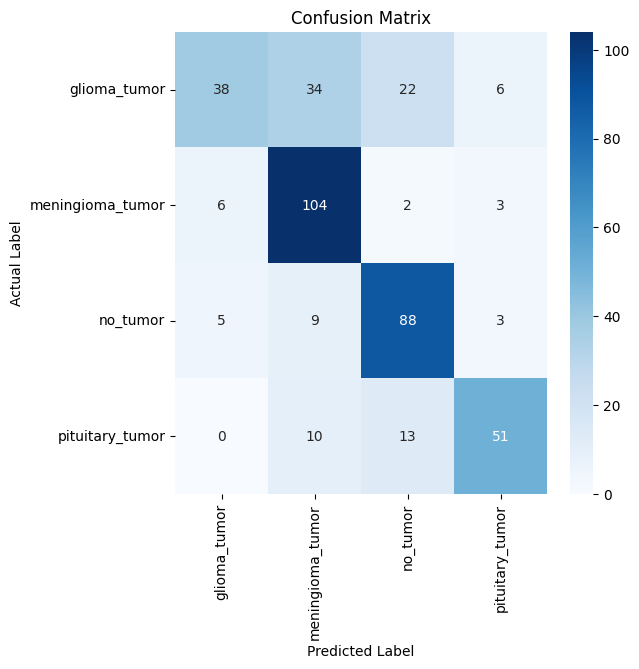


InceptionV3 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.78      0.38      0.51       100
meningioma_tumor       0.66      0.90      0.76       115
        no_tumor       0.70      0.84      0.77       105
 pituitary_tumor       0.81      0.69      0.74        74

        accuracy                           0.71       394
       macro avg       0.74      0.70      0.70       394
    weighted avg       0.73      0.71      0.70       394



In [23]:
build_and_train(InceptionV3, "InceptionV3")

# InceptionResNetV2


===== Training InceptionResNetV2 =====
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 736ms/step - accuracy: 0.4285 - loss: 1.3824 - val_accuracy: 0.5305 - val_loss: 1.1184
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.7438 - loss: 0.6908 - val_accuracy: 0.5609 - val_loss: 1.0651
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.7911 - loss: 0.5752 - val_accuracy: 0.5990 - val_loss: 1.0228
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 433ms/step - accuracy: 0.8089 - loss: 0.5270 - val_accuracy: 0.6142 - val_loss: 1.0343
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 431ms/step - accuracy: 0.8197 - loss: 0.4936 - val_accuracy: 0.6345 - val_loss: 1.0109
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 432ms/step - accuracy: 0.8303 - loss: 0.4824 - val_accuracy: 0.6472 - val_loss: 0.9977
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.8511 - loss: 0.4268 - val_accuracy: 0.6548 - val_loss: 0.9716
Epoc

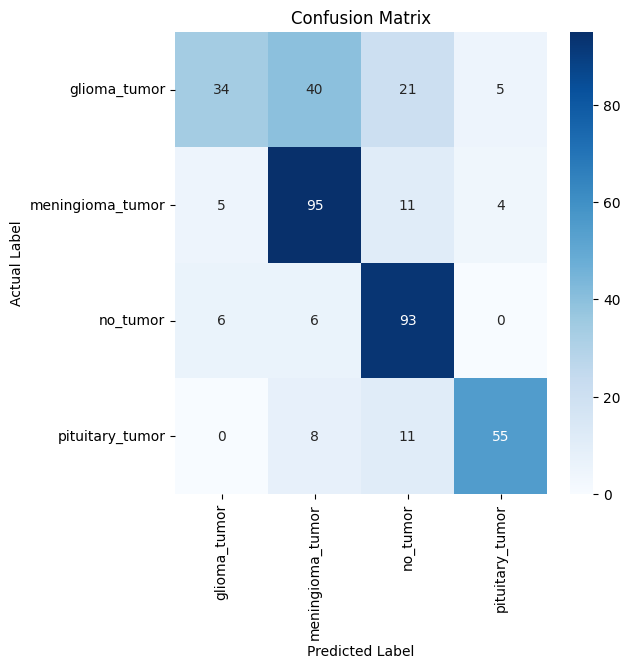


InceptionResNetV2 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.76      0.34      0.47       100
meningioma_tumor       0.64      0.83      0.72       115
        no_tumor       0.68      0.89      0.77       105
 pituitary_tumor       0.86      0.74      0.80        74

        accuracy                           0.70       394
       macro avg       0.73      0.70      0.69       394
    weighted avg       0.72      0.70      0.68       394



In [24]:
build_and_train(InceptionResNetV2, "InceptionResNetV2")

# MobileNetV2


===== Training MobileNetV2 =====
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 523ms/step - accuracy: 0.4268 - loss: 1.2545 - val_accuracy: 0.5076 - val_loss: 1.2551
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 416ms/step - accuracy: 0.7832 - loss: 0.6449 - val_accuracy: 0.5330 - val_loss: 1.4060
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 408ms/step - accuracy: 0.8123 - loss: 0.5269 - val_accuracy: 0.5431 - val_loss: 1.3766
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 421ms/step - accuracy: 0.8308 - loss: 0.4544 - val_accuracy: 0.5711 - val_loss: 1.3957
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 407ms/step - accuracy: 0.8493 - loss: 0.4174 - val_accuracy: 0.5711 - val_loss: 1.2765
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 407ms/step - accuracy: 0.8522 - loss: 0.4031 - val_accuracy: 0.5812 - val_loss: 1.3209
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 407ms/step - accuracy: 0.8703 - loss: 0.3496 - val_accuracy: 0.6168 - val_loss: 1.4061
Epoch 8/20
90/

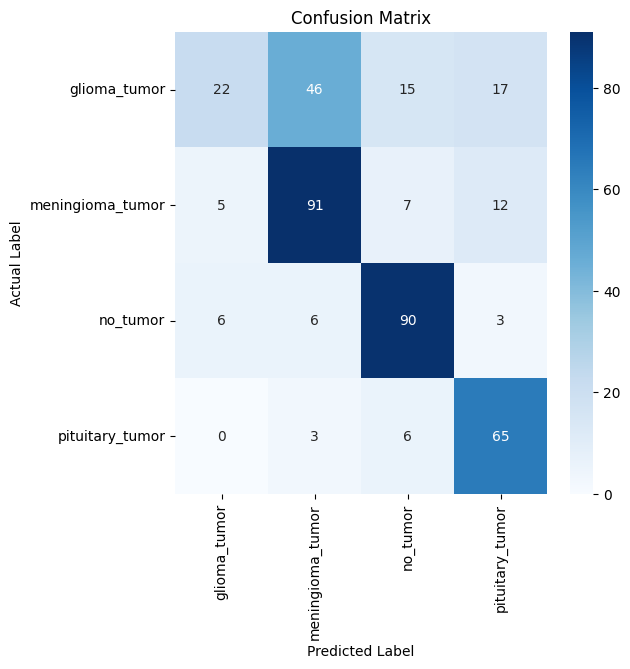


MobileNetV2 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.67      0.22      0.33       100
meningioma_tumor       0.62      0.79      0.70       115
        no_tumor       0.76      0.86      0.81       105
 pituitary_tumor       0.67      0.88      0.76        74

        accuracy                           0.68       394
       macro avg       0.68      0.69      0.65       394
    weighted avg       0.68      0.68      0.65       394



In [25]:
build_and_train(MobileNetV2, "MobileNetV2")

# DenseNet201


===== Training DenseNet201 =====
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4339 - loss: 1.2959 - val_accuracy: 0.4772 - val_loss: 1.3030
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 447ms/step - accuracy: 0.7444 - loss: 0.7408 - val_accuracy: 0.5558 - val_loss: 1.2522
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 441ms/step - accuracy: 0.8207 - loss: 0.5441 - val_accuracy: 0.5635 - val_loss: 1.1909
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 437ms/step - accuracy: 0.8334 - loss: 0.4867 - val_accuracy: 0.6041 - val_loss: 1.1699
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 436ms/step - accuracy: 0.8412 - loss: 0.4415 - val_accuracy: 0.6218 - val_loss: 1.1048
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 428ms/step - accuracy: 0.8746 - loss: 0.3911 - val_accuracy: 0.6472 - val_loss: 1.1011
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 423ms/step - accuracy: 0.8651 - loss: 0.3864 - val_accuracy: 0.6523 - val_loss: 1.1872
Epoch 8/20
90/

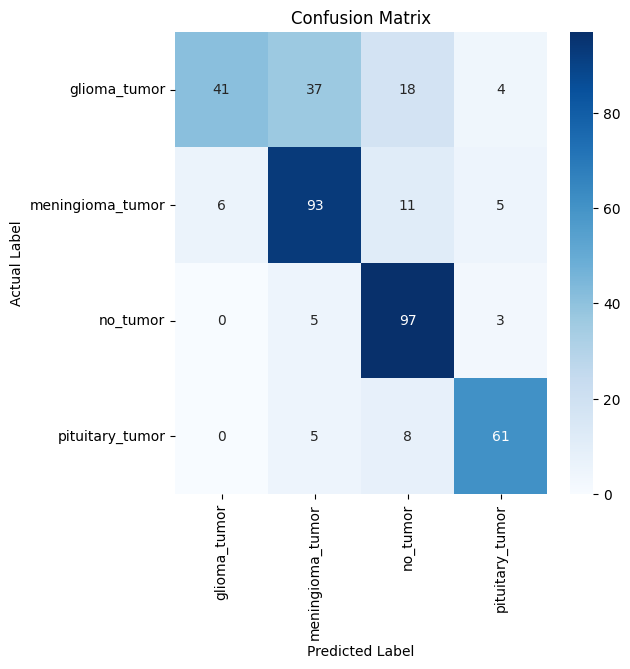


DenseNet201 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.41      0.56       100
meningioma_tumor       0.66      0.81      0.73       115
        no_tumor       0.72      0.92      0.81       105
 pituitary_tumor       0.84      0.82      0.83        74

        accuracy                           0.74       394
       macro avg       0.77      0.74      0.73       394
    weighted avg       0.77      0.74      0.73       394



In [26]:
build_and_train(DenseNet201, "DenseNet201")

# Helper function for model creation

In [27]:
def build_and_train1(model_class, model_name, train_set, test_set,
                    input_size=(224, 224, 3), lr=1e-4, epochs=20):

    print(f"\n===== Training {model_name} =====")

    base_model = model_class(weights='imagenet',
                             include_top=False,
                             input_shape=input_size)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(train_set.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_set, validation_data=test_set, epochs=epochs)

    # Predictions
    y_pred = model.predict(test_set)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_set.classes
    target_names = list(test_set.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred_classes)

    # Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred_classes,
                                target_names=target_names))


# NASNetLarge

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

===== Training NASNetLarge =====
343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


E0000 00:00:1764687040.133146      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764687040.274522      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


46/90 ━━━━━━━━━━━━━━━━━━━━ 41s 954ms/step - accuracy: 0.4985 - loss: 1.1759

E0000 00:00:1764687106.862149      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764687107.002656      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5635 - loss: 1.0631

E0000 00:00:1764687188.349565      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764687188.487044      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


90/90 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.5646 - loss: 1.0611 - val_accuracy: 0.4721 - val_loss: 1.1850
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7773 - loss: 0.6170 - val_accuracy: 0.5533 - val_loss: 1.1198
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8107 - loss: 0.5243 - val_accuracy: 0.5609 - val_loss: 1.1105
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8347 - loss: 0.4647 - val_accuracy: 0.5914 - val_loss: 1.0916
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8391 - loss: 0.4306 - val_accuracy: 0.5838 - val_loss: 1.0705
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8502 - loss: 0.4153 - val_accuracy: 0.6218 - val_loss: 1.0652
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8627 - loss: 0.3740 - val_accuracy: 0.6269 - val_loss: 1.0446
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8655 - loss: 0.3769 - val_accuracy: 0.6396 - val_loss: 1.0217
Ep

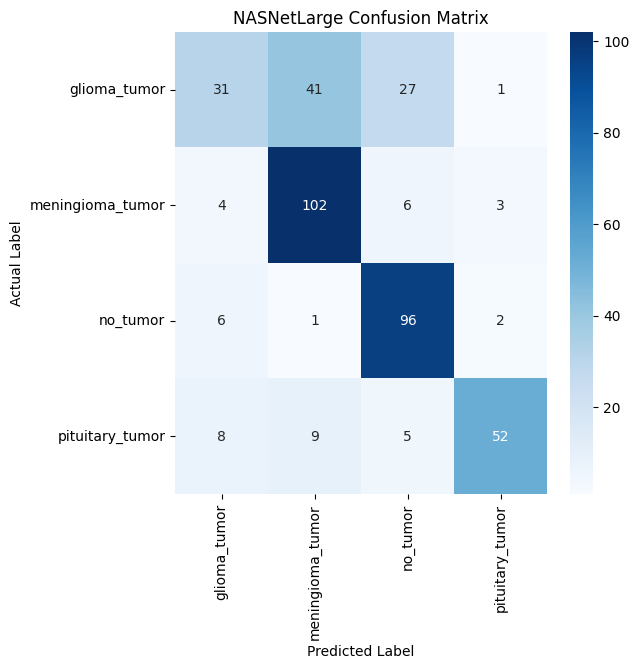


NASNetLarge Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.63      0.31      0.42       100
meningioma_tumor       0.67      0.89      0.76       115
        no_tumor       0.72      0.91      0.80       105
 pituitary_tumor       0.90      0.70      0.79        74

        accuracy                           0.71       394
       macro avg       0.73      0.70      0.69       394
    weighted avg       0.71      0.71      0.69       394



In [28]:
train_datagen_nas = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen_nas = ImageDataGenerator(rescale=1./255)

train_set = train_datagen_nas.flow_from_directory(train_path,
                                              target_size=(331, 331),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen_nas.flow_from_directory(test_path,
                                            target_size=(331, 331),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)

build_and_train1(
    NASNetLarge,
    "NASNetLarge",
    train_set,
    test_set,
    input_size=(331, 331, 3)
)

# EfficientNetB7

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

===== Training EfficientNetB7 =====
258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


E0000 00:00:1764689112.694405      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764689112.919395      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 7/90 ━━━━━━━━━━━━━━━━━━━━ 1:13 890ms/step - accuracy: 0.3116 - loss: 1.3421

E0000 00:00:1764689161.622122      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764689161.823075      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3056 - loss: 1.3323

E0000 00:00:1764689289.064614      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764689289.228543      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


90/90 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.3055 - loss: 1.3322 - val_accuracy: 0.3274 - val_loss: 1.4182
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 994ms/step - accuracy: 0.3469 - loss: 1.2967 - val_accuracy: 0.3579 - val_loss: 1.4792
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 994ms/step - accuracy: 0.3466 - loss: 1.2826 - val_accuracy: 0.2944 - val_loss: 1.5071
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3355 - loss: 1.2962 - val_accuracy: 0.3198 - val_loss: 1.5296
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3421 - loss: 1.2852 - val_accuracy: 0.3071 - val_loss: 1.5081
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 993ms/step - accuracy: 0.3522 - loss: 1.2861 - val_accuracy: 0.3020 - val_loss: 1.5597
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 976ms/step - accuracy: 0.3398 - loss: 1.2770 - val_accuracy: 0.3096 - val_loss: 1.5493
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 996ms/step - accuracy: 0.3491 - loss: 1.2688 - val_accuracy: 0.2944 - val_

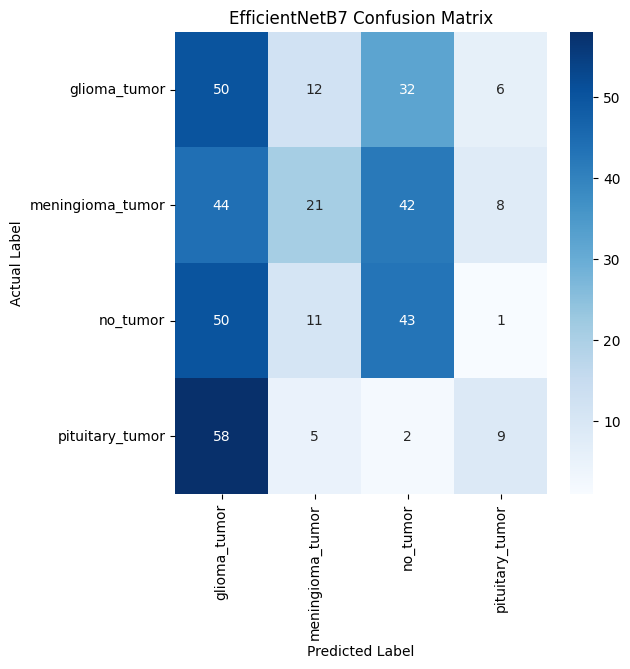


EfficientNetB7 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.50      0.33       100
meningioma_tumor       0.43      0.18      0.26       115
        no_tumor       0.36      0.41      0.38       105
 pituitary_tumor       0.38      0.12      0.18        74

        accuracy                           0.31       394
       macro avg       0.35      0.30      0.29       394
    weighted avg       0.35      0.31      0.30       394



In [29]:
train_datagen_nas = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen_nas = ImageDataGenerator(rescale=1./255)

train_set = train_datagen_nas.flow_from_directory(train_path,
                                              target_size=(331, 331),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen_nas.flow_from_directory(test_path,
                                            target_size=(331, 331),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)
build_and_train1(EfficientNetB7, "EfficientNetB7", train_set, test_set, input_size=(331, 331, 3))  # larger input

# EfficientNetV2 - B3


===== Training EfficientNetV2-B3 =====
52606240/52606240 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.2618 - loss: 1.3641 - val_accuracy: 0.2411 - val_loss: 1.4604
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 77s 855ms/step - accuracy: 0.3080 - loss: 1.3341 - val_accuracy: 0.2284 - val_loss: 1.4593
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 76s 844ms/step - accuracy: 0.3099 - loss: 1.3296 - val_accuracy: 0.1777 - val_loss: 1.4726
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 77s 853ms/step - accuracy: 0.3061 - loss: 1.3127 - val_accuracy: 0.2310 - val_loss: 1.4468
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 76s 842ms/step - accuracy: 0.3231 - loss: 1.3080 - val_accuracy: 0.2335 - val_loss: 1.4481
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 77s 849ms/step - accuracy: 0.3114 - loss: 1.3122 - val_accuracy: 0.2868 - val_loss: 1.4405
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 868ms/step - accuracy: 0.3119 - loss: 1.3181 - val_accuracy: 0.2132 - val_loss: 1.4712
Epoch 8/

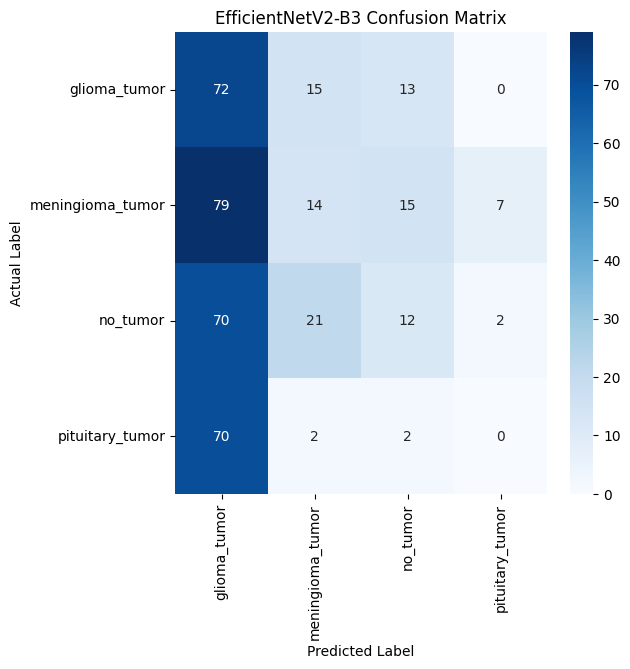


EfficientNetV2-B3 Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.72      0.37       100
meningioma_tumor       0.27      0.12      0.17       115
        no_tumor       0.29      0.11      0.16       105
 pituitary_tumor       0.00      0.00      0.00        74

        accuracy                           0.25       394
       macro avg       0.20      0.24      0.17       394
    weighted avg       0.22      0.25      0.19       394



In [30]:
build_and_train1(EfficientNetV2B3, "EfficientNetV2-B3", train_set, test_set, input_size=(331, 331, 3))  # larger input

# EfficientNetV2 - L

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

===== Training EfficientNetV2-L =====
473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.2935 - loss: 1.3532 - val_accuracy: 0.1904 - val_loss: 1.4487
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 888ms/step - accuracy: 0.3728 - loss: 1.3237 - val_accuracy: 0.2107 - val_loss: 1.4430
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 885ms/step - accuracy: 0.3837 - loss: 1.3134 - val_accuracy: 0.1954 - val_loss: 1.4462
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 878ms/step - accuracy: 0.3818 - loss: 1.3039 - val_accuracy: 0.1853 - val_loss: 1.4720
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 877ms/step - accuracy: 0.3921 - loss: 1.3019 - val_accuracy: 0.1827 - val_loss: 1.4862
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 880ms/step - accuracy: 0.4173 - loss: 1.2842 - val_accuracy: 0.2030 - val_loss: 1.4972
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 885ms/step - accuracy: 0.4130 - loss: 1.2793 - val_accuracy: 0.1929 - val_loss: 1.5167
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 884ms/step - accuracy: 0.4121 - loss: 1.2609 - val_accura

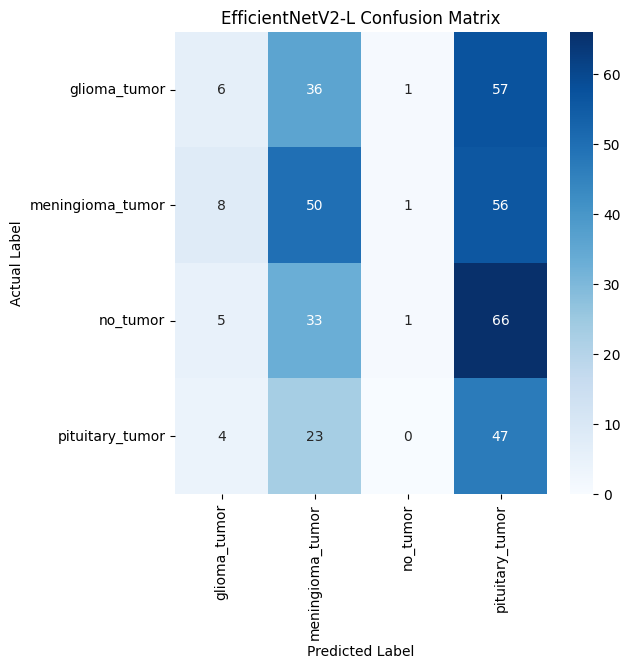


EfficientNetV2-L Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.26      0.06      0.10       100
meningioma_tumor       0.35      0.43      0.39       115
        no_tumor       0.33      0.01      0.02       105
 pituitary_tumor       0.21      0.64      0.31        74

        accuracy                           0.26       394
       macro avg       0.29      0.28      0.20       394
    weighted avg       0.30      0.26      0.20       394



In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

build_and_train1(EfficientNetV2L, "EfficientNetV2-L", train_set, test_set, input_size=(331, 331, 3))

# ConvNeXt-XLarge

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

===== Training ConvNeXt-XLarge =====
1393257616/1393257616 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


E0000 00:00:1764694571.159316      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694571.483435      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694573.588187      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694573.809900      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694575.506228      74 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

81/90 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3029 - loss: 1.3526

E0000 00:00:1764694793.918468      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694794.188035      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694795.676957      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694795.873552      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694797.270248      75 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3133 - loss: 1.3412

E0000 00:00:1764694868.711221      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694868.911882      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694869.573958      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694869.736086      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764694870.333919      76 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

90/90 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.3144 - loss: 1.3400 - val_accuracy: 0.3249 - val_loss: 1.5375
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.5352 - loss: 1.0884 - val_accuracy: 0.3680 - val_loss: 1.6114
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.5784 - loss: 1.0168 - val_accuracy: 0.3426 - val_loss: 1.6897
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.6050 - loss: 0.9683 - val_accuracy: 0.3452 - val_loss: 1.7201
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.6189 - loss: 0.9156 - val_accuracy: 0.3832 - val_loss: 1.7105
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.6467 - loss: 0.8971 - val_accuracy: 0.3655 - val_loss: 1.7210
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.6497 - loss: 0.8842 - val_accuracy: 0.3832 - val_loss: 1.7569
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.6602 - loss: 0.8401 - val_accuracy: 0.4112 - val_loss: 1.

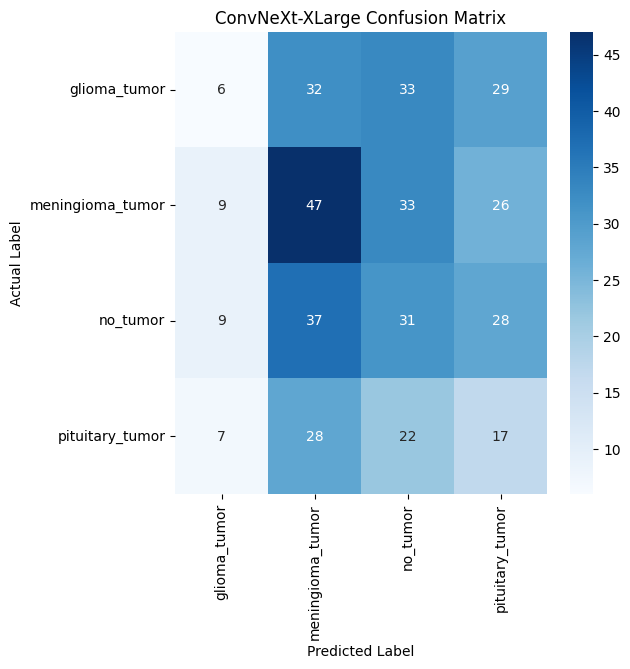


ConvNeXt-XLarge Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.19      0.06      0.09       100
meningioma_tumor       0.33      0.41      0.36       115
        no_tumor       0.26      0.30      0.28       105
 pituitary_tumor       0.17      0.23      0.20        74

        accuracy                           0.26       394
       macro avg       0.24      0.25      0.23       394
    weighted avg       0.25      0.26      0.24       394



In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

build_and_train1(ConvNeXtXLarge, "ConvNeXt-XLarge", train_set, test_set, input_size=(331, 331, 3))

# single Prediction

In [33]:
def predict_single_image(model, img_path, target_size=(224, 224), class_names=None, threshold=0.5):
    """
    Predicts the class of a single image using a trained model.
    Returns 'Unknown Image' if confidence is too low.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    confidence = np.max(pred)

    if confidence < threshold:
        return "Unknown Image"

    if class_names is None:
        class_names = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary', 'Brain Tumor']

    return f"Predicted: {class_names[pred_class]} (Confidence: {confidence:.2f})"
